Modelo anal√≠tico del chubasco electromagn√©tico - Bethe-Heitler

    Generaci√≥n  N_part√≠culas  Energ√≠a_por_part√≠cula (MeV)
0            0             1                  1000.000000
1            1             2                   500.000000
2            2             4                   250.000000
3            3             8                   125.000000
4            4            16                    62.500000
5            5            32                    31.250000
6            6            64                    15.625000
7            7           128                     7.812500
8            8           256                     3.906250
9            9           512                     1.953125
10          10             0                          NaN

t_max continuo ‚âà 9.966
t_max entero   = 9
N m√°ximo te√≥rico ‚âà 1000.0


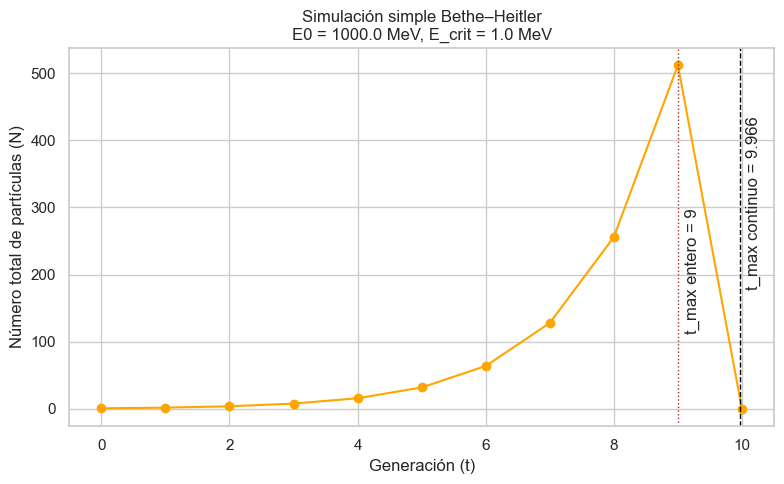

In [49]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Par√°metros
E0_MeV = 1000.0       # Energ√≠a inicial (MeV)
E_crit_MeV = 1.0      # Umbral (MeV)
max_generations = 10  # N√∫mero m√°ximo de generaciones

# Simulaci√≥n
generations = []
particles = [E0_MeV]  # lista de energ√≠as de part√≠culas

for gen in range(max_generations + 1):
    # Guardar info de la generaci√≥n actual
    generations.append({
        "Generaci√≥n": gen,
        "N_part√≠culas": len(particles),
        "Energ√≠a_por_part√≠cula (MeV)": particles[0] if len(particles) > 0 else None
    })
    
    # Crear la siguiente generaci√≥n
    new_particles = []
    for e in particles:
        child_energy = e / 2.0
        if child_energy >= E_crit_MeV:
            new_particles.append(child_energy)
            new_particles.append(child_energy)
    particles = new_particles

# Convertir a DataFrame
df = pd.DataFrame(generations)
df["Energ√≠a_por_part√≠cula (MeV)"] = df["Energ√≠a_por_part√≠cula (MeV)"].round(6)
print(df)

# C√°lculo del t_max te√≥rico
t_max_continuo = math.log(E0_MeV/E_crit_MeV) / math.log(2)
t_max_entero = math.floor(t_max_continuo)
N_teorico = E0_MeV / E_crit_MeV
print(f"\nt_max continuo ‚âà {t_max_continuo:.3f}")
print(f"t_max entero   = {t_max_entero}")
print(f"N m√°ximo te√≥rico ‚âà {N_teorico}")

# Gr√°fica
plt.figure(figsize=(8,5))
plt.plot(df["Generaci√≥n"], df["N_part√≠culas"], marker='o', color="orange")
plt.xlabel("Generaci√≥n (t)")
plt.ylabel("N√∫mero total de part√≠culas (N)")
plt.title("Simulaci√≥n simple Bethe‚ÄìHeitler\n"
          f"E0 = {E0_MeV} MeV, E_crit = {E_crit_MeV} MeV")

# L√≠neas que muestran los t_max
plt.axvline(t_max_continuo, linestyle='--', linewidth=1, color="black")
plt.text(t_max_continuo+0.1, max(df["N_part√≠culas"])*0.6, 
         f"t_max continuo = {t_max_continuo:.3f}", rotation=90, va='center')
plt.axvline(t_max_entero, linestyle=':', linewidth=1, color="brown")
plt.text(t_max_entero+0.1, max(df["N_part√≠culas"])*0.4, 
         f"t_max entero = {t_max_entero}", rotation=90, va='center')

plt.grid(True)
plt.tight_layout()
plt.show()


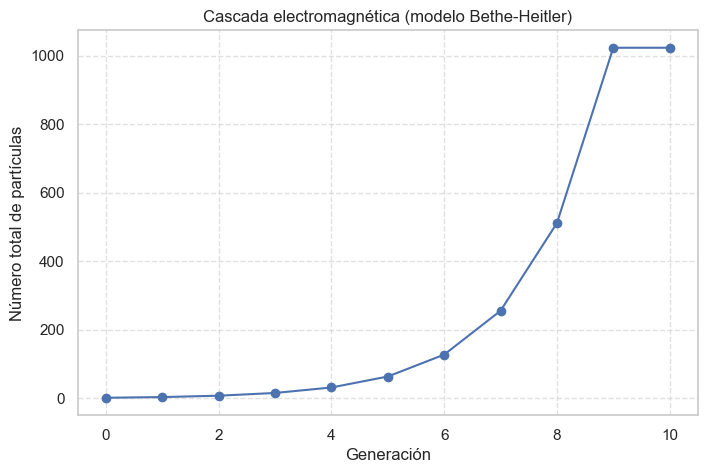

In [50]:
import matplotlib.pyplot as plt

# Par√°metros de simulaci√≥n
E0 = 1000.0  # Energ√≠a inicial del fot√≥n (MeV)
Emin = 1.0   # Umbral m√≠nimo de energ√≠a (MeV)
max_gen = 10 # N√∫mero m√°ximo de generaciones

# Inicializaci√≥n
generaciones = [0] * (max_gen + 1)  # n√∫mero de part√≠culas por generaci√≥n
particulas = [(E0, 0)]  # lista de tuplas (energ√≠a, generaci√≥n)

# Simulaci√≥n
while particulas:
    E, g = particulas.pop(0)
    if g >= max_gen:
        continue
    if E < Emin:
        continue
    
    # La part√≠cula se divide en dos con la mitad de la energ√≠a
    E_hija = E / 2
    particulas.append((E_hija, g + 1))
    particulas.append((E_hija, g + 1))
    
    # Contar
    generaciones[g] += 1

# Calcular n√∫mero acumulado de part√≠culas hasta cada generaci√≥n
acumulado = []
total = 0
for g in generaciones:
    total += g
    acumulado.append(total)

# Gr√°fica
plt.figure(figsize=(8,5))
plt.plot(range(max_gen+1), acumulado, marker="o", linestyle="-", color="b")
plt.title("Cascada electromagn√©tica (modelo Bethe-Heitler)")
plt.xlabel("Generaci√≥n")
plt.ylabel("N√∫mero total de part√≠culas")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Simulaci√≥n completada. Datos exportados y gr√°fico generado.


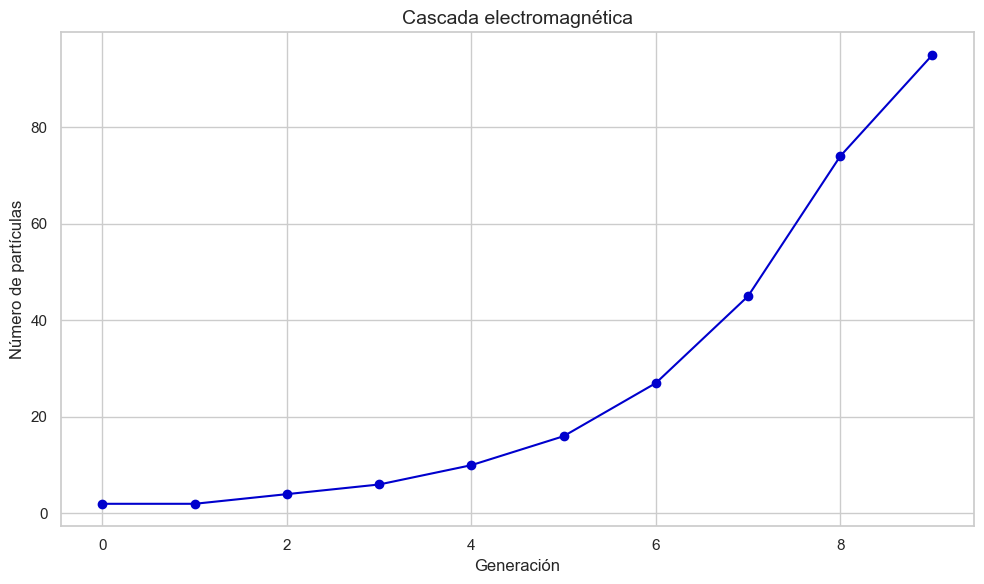

In [51]:
import random
import math
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10
ANNIHILATION_PROB = 0.3

# Estilo de gr√°ficos
sns.set(style="whitegrid")

# Clase de part√≠cula
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

    def __repr__(self):
        return f"{self.type.capitalize()}({self.energy:.2f} MeV)"
# Divisi√≥n aleatoria de energ√≠a
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# Simulaci√≥n de la cascada
def simulate_shower(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]
    all_data = [ ]
    generation_counts = [ ]
    while particles and generation < MAX_GENERATIONS:
        new_particles = [ ]
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron' and p.energy > threshold:
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < ANNIHILATION_PROB:
                   new_particles.append(Particle('gamma', p.energy))
        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)
        generation_counts.append(len(new_particles))
        particles = new_particles
        generation += 1
    return all_data, generation_counts

# Par√°metros de simulaci√≥n
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# Ejecutar simulaci√≥n
data, counts = simulate_shower(initial_energy, threshold)

# Exportar datos a CSV
output_csv_path = "/mnt/data/shower_data.csv"
os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
with open(output_csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Generaci√≥n", "Tipo", "Energ√≠a (MeV)"])
    writer.writerows(data)

# Visualizaci√≥n del n√∫mero de part√≠culas por generaci√≥n
plt.figure(figsize=(10, 6))
plt.plot(range(len(counts)), counts, marker='o', linestyle='-', color='mediumblue')
plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Cascada electromagn√©tica", fontsize=14)
plt.grid(True)
plt.tight_layout()

# Guardar gr√°fico
plot_path = "/mnt/data/shower_plot.png"
plt.savefig(plot_path)
#plt.close()

print("Simulaci√≥n completada. Datos exportados y gr√°fico generado.")




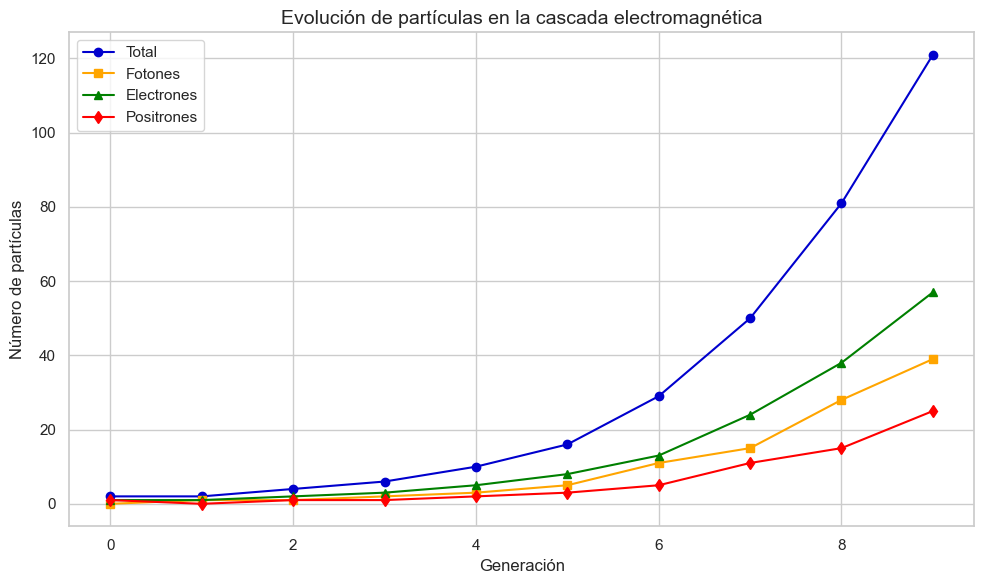

‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.


In [52]:
import random
import math
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ==== Constantes ====
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10
ANNIHILATION_PROB = 0.3

sns.set(style="whitegrid")

# ==== Clase de part√≠cula ====
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

# ==== Divisi√≥n aleatoria de energ√≠a ====
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# ==== Simulaci√≥n de la cascada ====
def simulate_shower(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]

    all_data = []
    counts_total = []
    counts_gamma = []
    counts_electron = []
    counts_positron = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron':
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < ANNIHILATION_PROB:
                    new_particles.append(Particle('gamma', p.energy))

        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)

        counts_total.append(len(new_particles))
        counts_gamma.append(sum(1 for p in new_particles if p.type == 'gamma'))
        counts_electron.append(sum(1 for p in new_particles if p.type == 'electron'))
        counts_positron.append(sum(1 for p in new_particles if p.type == 'positron'))

        particles = new_particles
        generation += 1

    return all_data, counts_total, counts_gamma, counts_electron, counts_positron

# ==== Par√°metros ====
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# ==== Ejecutar simulaci√≥n ====
data, counts_total, counts_gamma, counts_electron, counts_positron = simulate_shower(initial_energy, threshold)

# ==== CSV ====
output_csv_path = "shower_data03.csv"
with open(output_csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Generaci√≥n", "Tipo", "Energ√≠a (MeV)"])
    writer.writerows(data)

# ==== Graficar todas juntas ====
gens = range(len(counts_total))

plt.figure(figsize=(10, 6))
plt.plot(gens, counts_total, marker='o', linestyle='-', color='mediumblue', label="Total")
plt.plot(gens, counts_gamma, marker='s', linestyle='-', color='orange', label="Fotones")
plt.plot(gens, counts_electron, marker='^', linestyle='-', color='green', label="Electrones")
plt.plot(gens, counts_positron, marker='d', linestyle='-', color='red', label="Positrones")

plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Evoluci√≥n de part√≠culas en la cascada electromagn√©tica", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.")


Se observa que a medida que avanza la cascada, los electrones dominan en n√∫mero, aunque los fotones se mantienen cercanos.

Los positrones aparecen en menor cantidad y con un retraso, debido a que requieren pares 
ùõæ‚Üíùëí‚àíùëí+Œ≥‚Üíe‚àíe+.

Esto concuerda con la f√≠sica:

Los fotones iniciales producen pares electr√≥n-positr√≥n.

Los electrones y positrones generan radiaci√≥n de frenado (bremsstrahlung), que produce m√°s fotones.

Los positrones eventualmente se aniquilan, lo que limita su n√∫mero

El modelo Bethe‚ÄìHeitler captura la tendencia general (crecimiento de part√≠culas hasta alcanzar un m√°ximo cuando la energ√≠a por part√≠cula cae bajo el umbral).

La simulaci√≥n Monte Carlo muestra un comportamiento m√°s rico y realista, con mayor n√∫mero de part√≠culas y diferenciaci√≥n entre especies, reflejando la naturaleza probabil√≠stica de las interacciones electromagn√©ticas.

La comparaci√≥n muestra c√≥mo el modelo simple es √∫til para estimar la escala del fen√≥meno, mientras que la simulaci√≥n Monte Carlo es esencial para describir la cascada en detalle.

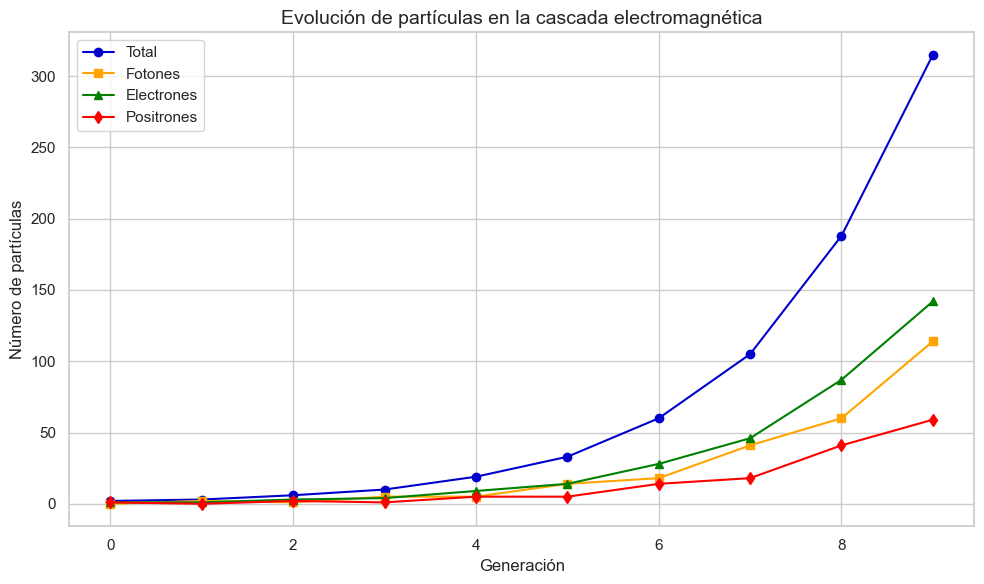

‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.


In [53]:

# ==== Constantes ====
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10
ANNIHILATION_PROB = 0.8

sns.set(style="whitegrid")

# ==== Clase de part√≠cula ====
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

# ==== Divisi√≥n aleatoria de energ√≠a ====
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# ==== Simulaci√≥n de la cascada ====
def simulate_shower(initial_energy, threshold):
    generation = 0
    particles = [Particle('gamma', initial_energy)]

    all_data = []
    counts_total = []
    counts_gamma = []
    counts_electron = []
    counts_positron = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron':
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < ANNIHILATION_PROB:
                    new_particles.append(Particle('gamma', p.energy))

        generation_data = [(generation, p.type, p.energy) for p in new_particles]
        all_data.extend(generation_data)

        counts_total.append(len(new_particles))
        counts_gamma.append(sum(1 for p in new_particles if p.type == 'gamma'))
        counts_electron.append(sum(1 for p in new_particles if p.type == 'electron'))
        counts_positron.append(sum(1 for p in new_particles if p.type == 'positron'))

        particles = new_particles
        generation += 1

    return all_data, counts_total, counts_gamma, counts_electron, counts_positron

# ==== Par√°metros ====
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# ==== Ejecutar simulaci√≥n ====
data, counts_total, counts_gamma, counts_electron, counts_positron = simulate_shower(initial_energy, threshold)

# ==== CSV ====
output_csv_path = "shower_data08.csv"
with open(output_csv_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Generaci√≥n", "Tipo", "Energ√≠a (MeV)"])
    writer.writerows(data)

# ==== Graficar todas juntas ====
gens = range(len(counts_total))

plt.figure(figsize=(10, 6))
plt.plot(gens, counts_total, marker='o', linestyle='-', color='mediumblue', label="Total")
plt.plot(gens, counts_gamma, marker='s', linestyle='-', color='orange', label="Fotones")
plt.plot(gens, counts_electron, marker='^', linestyle='-', color='green', label="Electrones")
plt.plot(gens, counts_positron, marker='d', linestyle='-', color='red', label="Positrones")

plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Evoluci√≥n de part√≠culas en la cascada electromagn√©tica", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("‚úÖ Simulaci√≥n completada. CSV exportado y gr√°fico combinado generado.")

‚úÖ Comparaci√≥n completada. Gr√°fica combinada generada: shower_comparison.png


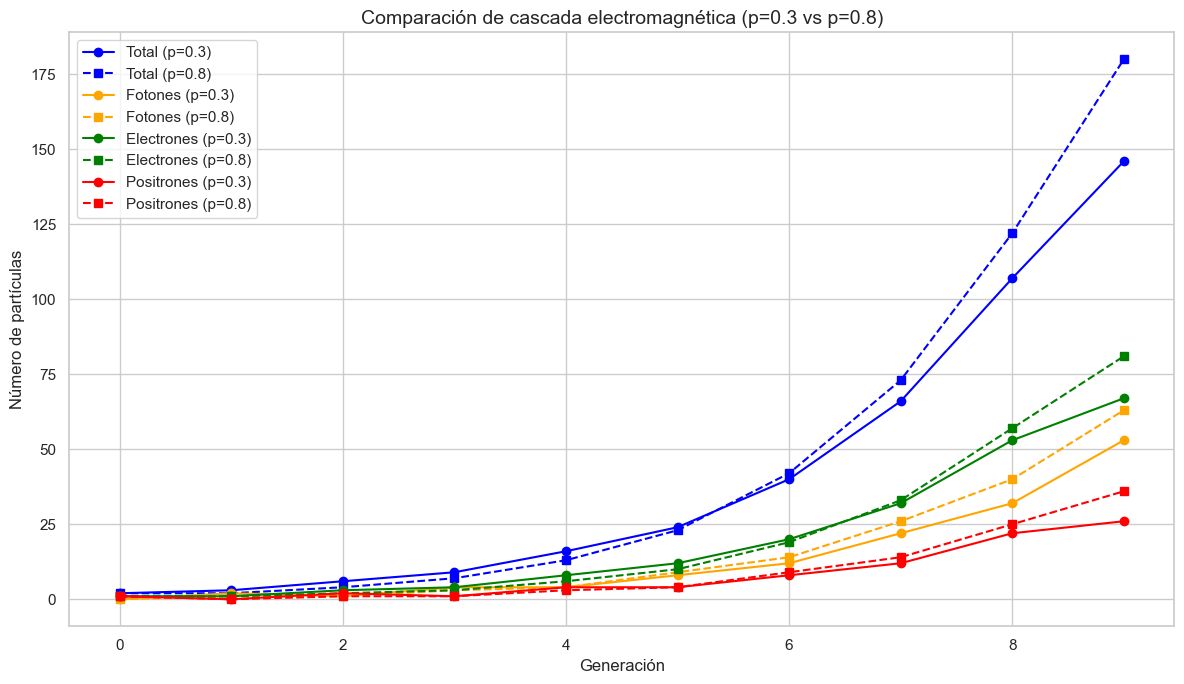

In [54]:
import random
import math
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes
ELECTRON_MASS = 0.511  # MeV
MAX_GENERATIONS = 10

# Estilo de gr√°ficos
sns.set(style="whitegrid")

# Clase de part√≠cula
class Particle:
    def __init__(self, type, energy):
        self.type = type
        self.energy = energy

    def __repr__(self):
        return f"{self.type.capitalize()}({self.energy:.2f} MeV)"

# Divisi√≥n aleatoria de energ√≠a
def random_split(energy):
    frac = random.uniform(0.3, 0.7)
    return (energy * frac, energy * (1 - frac))

# Simulaci√≥n de la cascada
def simulate_shower(initial_energy, threshold, annihilation_prob):
    generation = 0
    particles = [Particle('gamma', initial_energy)]
    counts_total = []
    counts_gamma = []
    counts_electron = []
    counts_positron = []

    while particles and generation < MAX_GENERATIONS:
        new_particles = []
        for p in particles:
            if p.energy < threshold:
                continue
            if p.type == 'gamma' and p.energy > 2 * ELECTRON_MASS:
                e_energy = random_split(p.energy)
                new_particles.append(Particle('electron', e_energy[0]))
                new_particles.append(Particle('positron', e_energy[1]))
            elif p.type == 'electron' and p.energy > threshold:
                gamma_energy = random_split(p.energy)[1]
                new_particles.append(Particle('gamma', gamma_energy))
                new_particles.append(Particle('electron', p.energy - gamma_energy))
            elif p.type == 'positron':
                if random.random() < annihilation_prob:
                    new_particles.append(Particle('gamma', p.energy))

        # Contar part√≠culas por tipo
        counts_total.append(len(new_particles))
        counts_gamma.append(sum(1 for p in new_particles if p.type == 'gamma'))
        counts_electron.append(sum(1 for p in new_particles if p.type == 'electron'))
        counts_positron.append(sum(1 for p in new_particles if p.type == 'positron'))

        particles = new_particles
        generation += 1

    return counts_total, counts_gamma, counts_electron, counts_positron

# Par√°metros de simulaci√≥n
initial_energy = 1000  # MeV
threshold = 1.0  # MeV

# Ejecutar simulaci√≥n con dos probabilidades distintas
counts_03 = simulate_shower(initial_energy, threshold, annihilation_prob=0.3)
counts_08 = simulate_shower(initial_energy, threshold, annihilation_prob=0.8)

# ====== Gr√°ficas comparativas ======
gens = range(len(counts_03[0]))

plt.figure(figsize=(12, 7))

# Total
plt.plot(gens, counts_03[0], marker='o', linestyle='-', color='blue', label="Total (p=0.3)")
plt.plot(gens, counts_08[0], marker='s', linestyle='--', color='blue', label="Total (p=0.8)")

# Fotones
plt.plot(gens, counts_03[1], marker='o', linestyle='-', color='orange', label="Fotones (p=0.3)")
plt.plot(gens, counts_08[1], marker='s', linestyle='--', color='orange', label="Fotones (p=0.8)")

# Electrones
plt.plot(gens, counts_03[2], marker='o', linestyle='-', color='green', label="Electrones (p=0.3)")
plt.plot(gens, counts_08[2], marker='s', linestyle='--', color='green', label="Electrones (p=0.8)")

# Positrones
plt.plot(gens, counts_03[3], marker='o', linestyle='-', color='red', label="Positrones (p=0.3)")
plt.plot(gens, counts_08[3], marker='s', linestyle='--', color='red', label="Positrones (p=0.8)")

plt.xlabel("Generaci√≥n", fontsize=12)
plt.ylabel("N√∫mero de part√≠culas", fontsize=12)
plt.title("Comparaci√≥n de cascada electromagn√©tica (p=0.3 vs p=0.8)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/mnt/data/shower_comparison.png")

print("‚úÖ Comparaci√≥n completada. Gr√°fica combinada generada: shower_comparison.png")


In [55]:
# Leer los dos archivos con encoding compatible
df_03 = pd.read_csv("shower_data03.csv", encoding="latin-1")
df_08 = pd.read_csv("shower_data08.csv", encoding="latin-1")

# Agrupar por generaci√≥n ‚Üí n√∫mero total de part√≠culas
count_03 = df_03.groupby("Generacion").size().reset_index(name="N_particulas")
count_08 = df_08.groupby("Generacion").size().reset_index(name="N_particulas")

# Gr√°fico comparativo
plt.figure(figsize=(8,5))
plt.plot(count_03["Generacion"], count_03["N_particulas"], marker='o', label="p_annih=0.3")
plt.plot(count_08["Generacion"], count_08["N_particulas"], marker='s', label="p_annih=0.8")
plt.xlabel("Generaci√≥n")
plt.ylabel("N√∫mero total de part√≠culas")
plt.title("Cascada electromagn√©tica - Comparaci√≥n de probabilidad de aniquilaci√≥n")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Generacion'